In [2]:
import pandas as pd, numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
# MPL Settings
import matplotlib as mpl,  matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

grey = '#808080'
darkgrey = '#505050'
# (http://www.color-hex.com/color/505050)

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = grey
mpl.rcParams['xtick.color'] = grey
mpl.rcParams['ytick.color'] = grey
mpl.rcParams['text.color'] = darkgrey
mpl.rcParams['axes.labelcolor'] = darkgrey
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300

In [4]:
wnba = pd.read_csv('src/wnba-player-stats-2017.zip')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [5]:
wnba.head()
wnba.tail()
wnba.shape

parameter = wnba['Games Played'].max()

sample = wnba.sample(n=30, random_state=1)

statistic = sample['Games Played'].max()
sampling_error = parameter - statistic

print(parameter, statistic, sampling_error)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


(143, 32)

32 30 2


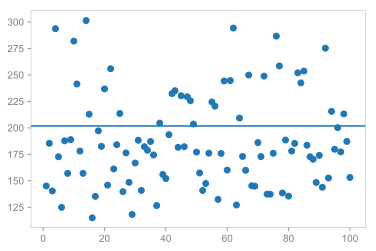

In [6]:
sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean())
plt.show()

Which position gets the most points?

In [7]:
wnba['Pts_per_game'] = wnba['PTS']/wnba['Games Played']

# Create dictionary of data frames, each one called by the key name:
group_dict = {key: wnba.loc[value] for key, value in wnba.groupby("Pos").groups.items()}
# Export resuls of operations to new dictionary:
res_dict = {key: group_dict[key]['Pts_per_game'].sample(n=10, random_state = 0).mean() for (key, value) in group_dict.items()}

position_most_points = max(res_dict, key=res_dict.get)
print(position_most_points)

C


,Games Played,Played Range
0,8,12 or less
1,30,23 or more
2,26,23 or more
3,31,23 or more
4,24,23 or more
5,14,22 or less
6,16,22 or less
7,26,23 or more
8,30,23 or more
9,7,12 or less


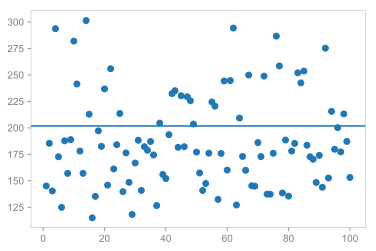

In [8]:
# Set bins based on values
wnba['Played Range'] = pd.cut(wnba['Games Played'], [0,12,22, wnba['Games Played'].max()], \
        include_lowest=False, right=True, labels=['12 or less', '22 or less', '23 or more'])
                                                                                                 
wnba[['Games Played', 'Played Range']].head(20)                                                                                              

sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean())
plt.show()

In [9]:
for i in range(3):
    print('Outputting sample {}:'.format(i))
    print(wnba.PTS.sample(n=5, random_state=i))

Outputting sample 0:
45     376
118     81
16      31
56       9
22     238
Name: PTS, dtype: int64
Outputting sample 1:
78     207
116     87
31      54
5       26
125    398
Name: PTS, dtype: int64
Outputting sample 2:
97     191
119     96
48     252
54      13
101     96
Name: PTS, dtype: int64


In [10]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game,Played Range
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,28,12,3,6,12,93,0,0,11.625000,12 or less
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,101,72,63,13,40,217,0,0,7.233333,23 or more
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,40,78,22,3,24,218,0,0,8.384615,23 or more
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,169,65,20,10,38,188,2,0,6.064516,23 or more
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,12,12,7,0,14,50,0,0,2.083333,23 or more


In [11]:
# List of dataframes
data_list = []
for i in range(100):
    df_a = wnba[wnba['Played Range'] == '23 or more'].sample(n=7, random_state=i)
    df_b = wnba[wnba['Played Range'] == '22 or less'].sample(n=2, random_state=i)
    df_c = wnba[wnba['Played Range'] == '12 or less'].sample(n=1, random_state=i)
    df_m = pd.concat([df_a, df_b, df_c])
    data_list.append(df_m)
 
# List of means
means_list = [i['PTS'].mean() for i in data_list]

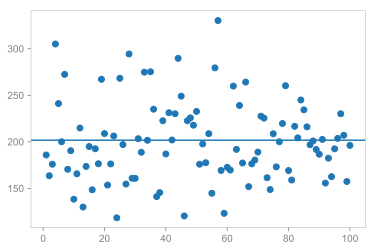

In [12]:
plt.scatter(range(1, 101), means_list)
plt.axhline(wnba.PTS.mean())
plt.show()

In [13]:
print(wnba['MIN'].value_counts(bins = 5, normalize = True))
wnba.head()
# wnba[['MIN', 'Mins_Bin']].head()

(213.2, 414.4]     0.223776
(615.6, 816.8]     0.202797
(10.993, 213.2]    0.202797
(816.8, 1018.0]    0.195804
(414.4, 615.6]     0.174825
Name: MIN, dtype: float64


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game,Played Range
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,28,12,3,6,12,93,0,0,11.625000,12 or less
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,101,72,63,13,40,217,0,0,7.233333,23 or more
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,40,78,22,3,24,218,0,0,8.384615,23 or more
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,169,65,20,10,38,188,2,0,6.064516,23 or more
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,12,12,7,0,14,50,0,0,2.083333,23 or more


In [14]:
wnba['Team'].unique()

sample_teams = list(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))
print(sample_teams)

# Filter DF on multiple values
cluster = wnba.loc[wnba['Team'].isin(sample_teams)]
metrics = ['Height', 'Age', 'BMI', 'PTS']
orig_dict = wnba[metrics].mean().to_dict()
clust_dict = cluster[metrics].mean().to_dict()
print(orig_dict)
print(clust_dict)

sampling_error_height = orig_dict[metrics[0]] - clust_dict[metrics[0]]
sampling_error_age = orig_dict[metrics[1]] - clust_dict[metrics[1]]
sampling_error_BMI = orig_dict[metrics[2]] - clust_dict[metrics[2]]
sampling_error_points = orig_dict[metrics[3]] - clust_dict[metrics[3]]

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

['PHO', 'IND', 'MIN', 'ATL']
{'Height': 184.56643356643357, 'Age': 27.076923076923077, 'BMI': 23.091214227746466, 'PTS': 201.7902097902098}
{'Height': 184.6304347826087, 'Age': 28.47826086956522, 'BMI': 22.86025978608696, 'PTS': 229.58695652173913}


In [15]:
print(sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points)

-0.06400121617511445 -1.401337792642142 0.23095444165950596 -27.79674673152934


In [16]:
print(orig_dict[metrics[0]])
print(clust_dict['Height'])

184.56643356643357
184.6304347826087


In [17]:
print(sampling_error_height)

-0.06400121617511445


In [18]:
print(clust_dict['Height'])

184.6304347826087


In [19]:
# Grouped Frequency by customised bins
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
# pd.Series(
wnba.groupby(pd.cut(wnba['PTS'], intervals), as_index=False).size().reset_index()
#     )

,PTS,0
0,"(0, 60]",30
1,"(60, 120]",25
2,"(120, 180]",17
3,"(180, 240]",22
4,"(240, 300]",15
5,"(300, 360]",7
6,"(360, 420]",11
7,"(420, 480]",7
8,"(480, 540]",4
9,"(540, 600]",5


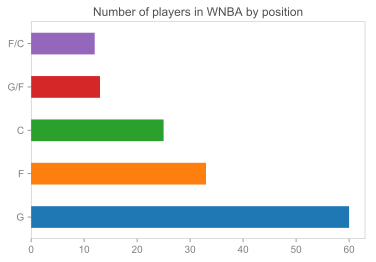

In [26]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

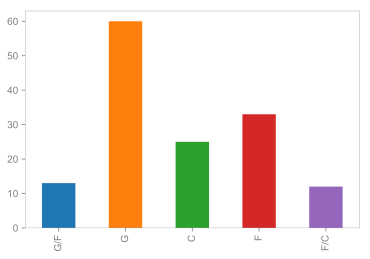

In [30]:
wnba['Pos'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot=90)

Text(0,0.5,'')

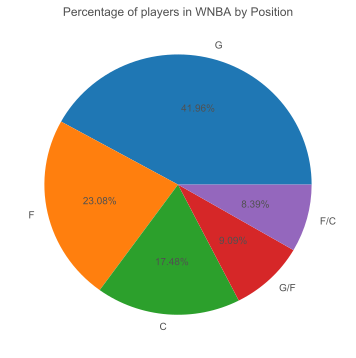

In [21]:
# Pie
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), \
title = 'Percentage of players in WNBA by Position', autopct = '%.2f%%')

# csfont = {'fontname':'Arial'}
# hfont = {'fontname':'Arial'}

plt.ylabel('')
# plt.title('Percentage of players in WNBA by Position',**csfont)
# plt.xlabel('', **hfont)
plt.show()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

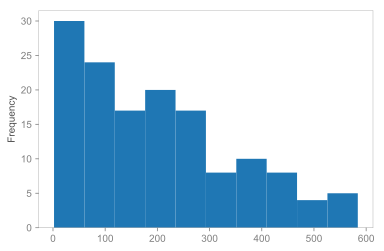

In [28]:
wnba['PTS'].plot.hist()
wnba['PTS'].describe()

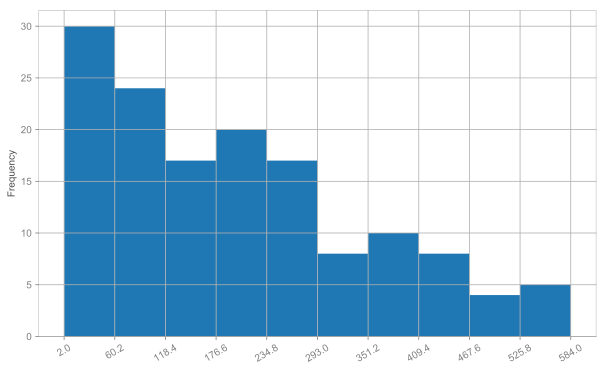

In [23]:
# Histogram with Grid
wnba['PTS'].plot.hist(grid = True, xticks = np.arange(2,585,58.2), rot = 30, figsize = (10,6))

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

(1.969, 5.0]     5
(5.0, 8.0]       4
(8.0, 11.0]      3
(11.0, 14.0]     5
(14.0, 17.0]     6
(17.0, 20.0]     8
(20.0, 23.0]    15
(23.0, 26.0]    18
(26.0, 29.0]    48
(29.0, 32.0]    31
Name: Games Played, dtype: int64

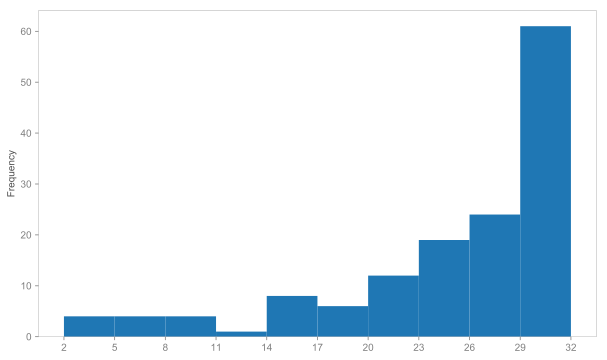

In [24]:
wnba['Games Played'].describe()
wnba['Games Played'].value_counts(bins = 10).sort_index()

# Use min, max and bin width from value counts above (max + 1 for final x label)
wnba['Games Played'].plot.hist(grid = False, xticks = np.arange(2,33,3), rot = 0, figsize = (10,6))

Text(0.5,1,'The distribution of players by games played')

Text(0.5,0,'Games played')

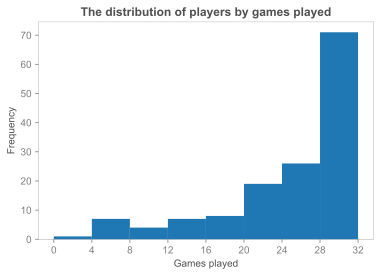

In [25]:
mpl.rc('axes',edgecolor='grey')
wnba['Games Played'].plot.hist(range = (0,32), bins = 8, xticks = range(0,33,4),)

plt.title("The distribution of players by games played",fontweight="bold")
plt.xlabel("Games played")
# plt.savefig('Games_Played.png')